# GTEx Sample

Author: Moshe Silverstein <br/>
Date: 12-2017 <br/>
Data Source Home: https://www.gtexportal.org/home/ <br/>
Data Source Downlaod: https://www.gtexportal.org/home/datasets

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Tue Mar 06 13:54:14 2018 EST

# Load Data

In [5]:
file = 'Input/GTEx_Analysis_v6p_RNA-seq_RNA-SeQCv1.1.8_gene_rpkm.gct'
matrix = pd.read_csv(file, sep='\t' ,skiprows=2)

In [6]:
matrix.head()

,Name,Description,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
0,ENSG00000223972.4,DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
1,ENSG00000227232.4,WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
2,ENSG00000243485.2,MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ENSG00000237613.2,FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000268020.2,OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
matrix.shape

(56238, 8557)

# Load Sample Metadata 

In [8]:
sample_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SampleAttributesDS.txt', sep='\t', index_col=0)

In [9]:
sample_meta.head()

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMTSTPTREF,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,NaN,NaN,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,13756,NaN,NaN,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0226-SM-5GZZ7,0.0,B1,"2 pieces, ~15% vessel stroma, rep delineated",6.8,Adipose Tissue,Adipose - Subcutaneous,2190,1214.0,1125.0,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0426-SM-5EGHI,0.0,B1,"2 pieces, !5% fibrous connective tissue, delin...",7.1,Muscle,Muscle - Skeletal,11907,1220.0,1119.0,Actual Death,...,12207544.0,10849322.0,0.002745,12393839.0,50.378628,0.008671,0.94627,837.0,0.276804,50.254814
GTEX-1117F-0526-SM-5EGHJ,0.0,B1,"2 pieces, clean, Monckebeg medial sclerosis, r...",8.0,Blood Vessel,Artery - Tibial,7610,1221.0,1120.0,Actual Death,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sample_meta.shape

(11983, 63)

# Load Subject Meta

In [11]:
subject_meta = pd.read_csv('Input/GTEx_Data_V6_Annotations_SubjectPhenotypesDS.txt', sep='\t', index_col=0)

#### change gender from 1,2 to M,F

In [12]:
def geneder(s):
    if s == 1:
        return('M')
    elif s== 2:
        return('F')

In [13]:
subject_meta['GENDER'] = subject_meta['GENDER'].map(geneder)

In [14]:
subject_meta.head()

,GENDER,AGE,DTHHRDY
SUBJID,,,
GTEX-N7MS,M,60-69,2.0
GTEX-NFK9,M,40-49,0.0
GTEX-NL3G,F,60-69,2.0
GTEX-NL4W,M,50-59,4.0
GTEX-NPJ7,F,60-69,4.0


In [15]:
subject_meta.shape

(570, 3)

In [16]:
sample_meta = sample_meta['SMTSD']

In [17]:
combined_sample_meta = pd.DataFrame(columns=['Donor', 'Gender', 'Age', 'Tissue'])


for i,index in enumerate(sample_meta.index):
    
    progressPercent = ((i+1)/len(sample_meta.index))*100

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(sample_meta.index)))
    sys.stdout.flush()
    
    if ('-').join(index.split('-')[0:2]) in subject_meta.index:
#         combined_sample_meta.loc[index, 'Sample'] = index
        combined_sample_meta.loc[index, 'Donor'] = ('-').join(index.split('-')[0:2])
        combined_sample_meta.loc[index, 'Gender'] = subject_meta.loc[combined_sample_meta.loc[index, 'Donor'], 'GENDER']
        combined_sample_meta.loc[index, 'Age'] = subject_meta.loc[combined_sample_meta.loc[index, 'Donor'], 'AGE']
        combined_sample_meta.loc[index, 'Tissue'] = sample_meta.loc[index]

In [18]:
combined_sample_meta.head()

,Donor,Gender,Age,Tissue
GTEX-1117F-0003-SM-58Q7G,GTEX-1117F,F,60-69,Whole Blood
GTEX-1117F-0003-SM-5DWSB,GTEX-1117F,F,60-69,Whole Blood
GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F,F,60-69,Adipose - Subcutaneous
GTEX-1117F-0426-SM-5EGHI,GTEX-1117F,F,60-69,Muscle - Skeletal
GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F,F,60-69,Artery - Tibial


# Set Matrix to Show Gene Symbols

In [19]:
matrix.rename(columns={"Description": "Gene Symbol"}, inplace=True)

In [20]:
matrix.set_index('Gene Symbol', inplace=True)

In [21]:
matrix.drop('Name', axis=1, inplace=True)

In [22]:
matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Map Sample Metadata to Sample ID

In [23]:
# lst = []

# for i,col in enumerate(matrix.columns):
    
#     progressPercent = ((i+1)/len(matrix.columns))*100

#     sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.columns)))
#     sys.stdout.flush()
    
#     donor = 'Donor:'+('-').join(col.split('-')[0:2])
#     gender = 'Gender:'+subject_meta.loc[donor.split(':')[1], 'GENDER']
#     age = 'Age:'+subject_meta.loc[donor.split(':')[1], 'AGE']
#     tissue = 'Tissue:'+sample_meta.loc[col, 'SMTSD']
#     lst.append(tuple((donor, gender, age, tissue)))
    
# matrix.columns = lst

In [24]:
matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Histogram of First Sample

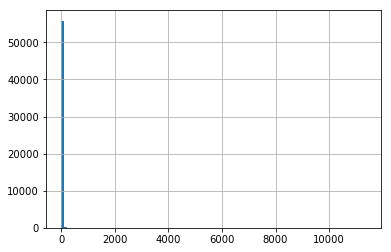

In [25]:
matrix[matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

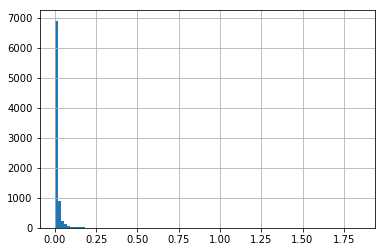

In [26]:
matrix.loc[matrix.index[0]].hist(bins=100)

## Save Unfiltered Sample Matrix To File

In [27]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [28]:
matrix.shape

(56238, 8555)

In [29]:
normalized_matrix = matrix.copy()

In [30]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [31]:
normalized_matrix.shape

(40837, 8555)

In [32]:
normalized_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
DDX11L1,0.085107,0.085107,0.085107,0.085107,0.085107,0.085107,0.023956,0.085107,0.085107,0.085107,...,0.019434,0.061915,0.085107,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.508960,10.745692,6.670499,6.384469,6.833630,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,...,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197,0.051197
RP11-34P13.7,0.236921,0.322958,0.265657,0.216597,0.232878,0.290084,0.218548,0.281672,0.369737,0.234941,...,0.072531,0.552016,0.835682,0.101835,0.349369,0.131001,1.084733,0.088808,0.324725,0.319094
CICP27,0.052053,0.003991,0.027454,0.011192,0.052053,0.052053,0.052053,0.052053,0.022719,0.025846,...,0.022903,0.233496,0.388104,0.012863,0.182030,0.087997,1.354209,0.020191,0.383337,0.238644


# Log2 Transform

In [33]:
matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.023956,0.000000,0.000000,0.000000,...,0.019434,0.061915,0.000000,0.013643,0.339341,0.287188,0.046711,0.278409,0.120472,0.040500
WASH7P,6.50896,10.745692,6.670499,6.384469,6.83363,7.115656,7.954349,6.863994,6.805336,4.403805,...,2.884658,8.876904,4.701957,5.904234,8.391052,6.435690,8.869359,12.766889,7.886225,9.202537
MIR1302-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4G4P,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
normalized_matrix = mf.log2(normalized_matrix)

In [35]:
normalized_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
DDX11L1,0.117837,0.117837,0.117837,0.117837,0.117837,0.117837,0.034153,0.117837,0.117837,0.117837,...,0.027769,0.086669,0.117837,0.019550,0.421523,0.364223,0.065863,0.354349,0.164107,0.057276
WASH7P,2.908613,3.554060,2.939320,2.884494,2.969681,3.020708,3.162589,2.975262,2.964461,2.433976,...,1.957788,3.304059,2.511457,2.787481,3.231287,2.894467,3.302956,3.783131,3.151571,3.350856
MIR1302-11,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,...,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034
RP11-34P13.7,0.306753,0.403767,0.339887,0.282851,0.302030,0.367466,0.285163,0.358027,0.453899,0.304442,...,0.101020,0.634144,0.876316,0.139909,0.432285,0.177600,1.059863,0.122750,0.405692,0.399547
CICP27,0.073208,0.005746,0.039074,0.016057,0.073208,0.073208,0.073208,0.073208,0.032410,0.036814,...,0.032670,0.302753,0.473115,0.018439,0.241266,0.121675,1.235243,0.028839,0.468153,0.308762


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [36]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [37]:
normalized_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
DDX11L1,0.120216,0.126208,0.122942,0.118518,0.122915,0.117452,0.031015,0.123603,0.114756,0.127741,...,0.041213,0.109348,0.132113,0.022759,0.630082,0.467087,0.075445,0.526564,0.192945,0.068675
WASH7P,2.697853,3.307184,2.720195,2.814279,2.818253,2.913809,2.915709,2.842501,2.842239,2.359022,...,3.305326,3.564138,3.308724,3.604828,3.815083,3.451737,3.763502,4.333413,3.599214,3.631638
MIR1302-11,0.073530,0.079854,0.076224,0.071785,0.075674,0.070094,0.068096,0.075811,0.068744,0.079371,...,0.089259,0.093254,0.080476,0.076293,0.077751,0.072844,0.081596,0.082231,0.084603,0.083909
RP11-34P13.7,0.320060,0.408437,0.345392,0.291568,0.314236,0.386331,0.274221,0.391483,0.447105,0.334021,...,0.124465,0.995349,1.542996,0.152898,0.654664,0.194332,1.780547,0.140895,0.566972,0.544290
CICP27,0.074448,0.006859,0.041731,0.016381,0.076660,0.071085,0.069217,0.076752,0.029451,0.042910,...,0.046566,0.410374,0.760015,0.021679,0.290433,0.126420,2.003971,0.036647,0.674897,0.389885


# Normalize Matrix (z-score the rows)

In [38]:
genes = normalized_matrix.index.values.tolist()

In [39]:
normalized_matrix.reset_index(inplace=True)

In [41]:
normalized_matrix.drop('index', axis=1, inplace=True)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.index = genes

In [44]:
normalized_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
DDX11L1,0.311237,0.620797,0.452053,0.223522,0.450667,0.168406,-4.297352,0.486194,0.029124,0.700013,...,-3.770482,-0.250279,0.925908,-4.723878,26.653477,18.232342,-2.001888,21.305243,4.068753,-2.351668
WASH7P,-0.974743,0.251431,-0.929784,-0.740456,-0.732459,-0.540169,-0.536345,-0.683664,-0.684192,-1.656584,...,0.247693,0.768508,0.254529,0.850389,1.273493,0.542320,1.169694,2.316543,0.839093,0.904339
MIR1302-11,0.204646,0.879927,0.492279,0.018311,0.433573,-0.162271,-0.375649,0.448230,-0.306486,0.828326,...,1.884262,2.310855,0.946391,0.499637,0.655380,0.131312,1.065909,1.133754,1.387053,1.312986
RP11-34P13.7,0.573569,1.272680,0.773958,0.348175,0.527494,1.097812,0.210954,1.138567,1.578572,0.684006,...,-0.973714,5.915525,10.247751,-0.748786,3.220490,-0.421020,12.126931,-0.843743,2.526796,2.347361
CICP27,0.261171,-2.324845,-0.990625,-1.960552,0.345816,0.132491,0.061033,0.349343,-1.460446,-0.945491,...,-0.805635,13.114096,26.491779,-1.757819,8.525019,2.249680,74.087068,-1.185117,23.235088,12.330165


# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [45]:
mf.mapgenesymbols(normalized_matrix)

In [46]:
normalized_matrix.shape

(25837, 8555)

# Merge Duplicate Genes By Rows

In [47]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [48]:
normalized_matrix.shape

(25577, 8555)

# Histogram of First Celline

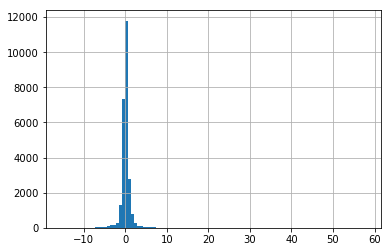

In [49]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

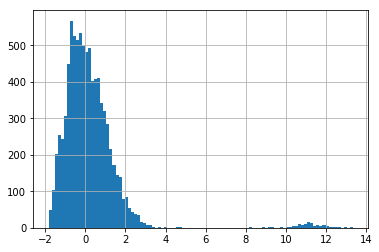

In [50]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=100)

# Save Filtered Sample Matrix To File

In [51]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Data

In [52]:
# net.load_df(normalized_matrix.iloc[:,:100].copy())
# net.filter_N_top('row', rank_type='sum', N_top=50)
# net.cluster()
# net.widget()

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2M-AS1,144571


In [55]:
gene_list.shape

(25577, 2)

# Save Gene List

In [56]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [57]:
attribute_list = mf.createAttributeList(normalized_matrix, combined_sample_meta)

In [58]:
attribute_list.head()

,Donor,Gender,Age,Tissue
Attributes,,,,
GTEX-111CU-1826-SM-5GZYN,GTEX-111CU,M,50-59,Adipose - Subcutaneous
GTEX-111FC-0226-SM-5N9B8,GTEX-111FC,M,60-69,Adipose - Subcutaneous
GTEX-111VG-2326-SM-5N9BK,GTEX-111VG,M,60-69,Adipose - Subcutaneous
GTEX-111YS-2426-SM-5GZZQ,GTEX-111YS,M,60-69,Adipose - Subcutaneous
GTEX-1122O-2026-SM-5NQ91,GTEX-1122O,F,60-69,Adipose - Subcutaneous


In [59]:
attribute_list.shape

(8555, 4)

# Save Attribute List

In [60]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.190338,0.076007,0.393958,-0.552447,-0.170321,-0.358946,0.342294,-0.539125,-0.139950,-0.420868,...,0.090963,0.859116,0.142643,0.636469,0.640220,-0.648727,0.447277,0.476038,0.264455,-0.188547
A1BG-AS1,0.242011,0.215143,0.246449,-0.481378,0.266330,-0.128713,0.294848,-0.711141,0.236637,-0.722838,...,-0.789452,0.872695,0.276848,-0.587496,-0.097635,-0.267786,0.671587,0.734481,0.371056,-0.365710
A1CF,0.624529,0.504804,-0.485136,-0.132244,0.615170,-0.643821,-0.954257,-0.703676,0.104994,0.681869,...,-0.501730,-0.523938,0.870111,0.250408,-0.533288,-0.511783,0.863090,0.310036,-0.268263,0.161594
A2M,0.382096,0.635354,0.701792,0.667886,0.595359,0.517241,0.520989,0.583431,0.752761,0.488257,...,-0.921250,-0.961673,-0.981062,-0.933635,-0.924290,-0.954199,-0.977330,-0.895777,-0.982697,-0.994583
A2M-AS1,0.417824,0.511364,0.354925,0.434914,0.191056,0.142892,0.571684,0.285272,0.750854,0.457822,...,0.976574,-0.845092,-0.944894,-0.516684,-0.991599,-0.921526,-0.956807,-0.858426,-0.918720,-0.932278


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

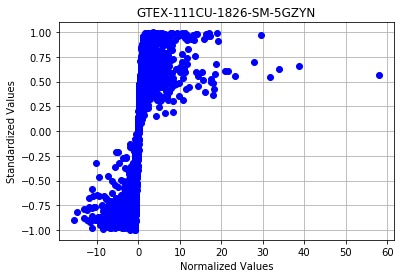

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,-1,-1,0,0,-1,-1,0,-1,-1
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-1,0,-1,0,0,0


# Save Teriary Matrix

In [68]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Path to output files

In [69]:
path = '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/Output/'

# Create Up Gene Set Library

In [70]:
name = 'gtex_sample_gene_up_set'

In [71]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [72]:
name = 'gtex_sample_gene_down_set'

In [73]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [74]:
name = 'gtex_sample_attribute_up_set'

In [75]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [76]:
name = 'gtex_sample_attribute_down_set'

In [77]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Gene Similarity Matrix

In [78]:
gene_similarity_matrix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [79]:
gene_similarity_matrix.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.612828,0.529025,-0.018584,0.135683,-0.082270,0.001634,0.084877,0.009856,-0.222322,...,-0.041562,0.001131,-0.100283,0.185042,-0.038307,0.131590,-0.046059,-0.120769,-0.288604,0.047272
A1BG-AS1,0.612828,1.000000,0.172054,-0.115033,0.038484,-0.091461,-0.059794,0.076701,0.096777,-0.145580,...,0.106341,0.128364,0.013013,0.113184,-0.100676,0.120800,-0.108672,0.144079,-0.153231,0.068583
A1CF,0.529025,0.172054,1.000000,-0.065875,-0.006899,0.104135,0.059643,0.054238,0.048459,-0.308759,...,-0.023823,0.168607,-0.158680,0.093981,0.160415,0.214602,-0.000239,-0.103276,0.104394,-0.109864
A2M,-0.018584,-0.115033,-0.065875,1.000000,0.596029,-0.196197,-0.097510,0.190778,-0.254326,0.618843,...,-0.186211,-0.360088,0.290283,0.206017,0.009351,-0.248242,-0.063728,0.192450,0.077297,0.275601
A2M-AS1,0.135683,0.038484,-0.006899,0.596029,1.000000,-0.262563,-0.113026,0.304104,-0.128901,0.410608,...,-0.181430,-0.356717,0.308459,0.148949,-0.099564,-0.152490,0.108390,0.258800,-0.017920,0.198430


# HeatMap (clustergrammer) of Gene Similarity Matrix

In [81]:
#sampling = gene_similarity_matix.iloc[0:50,0:50].copy()

In [ ]:
# net.load_df(sampling)
# net.cluster()
# net.widget()

# Save Gene Similarity Matrix 

In [82]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute Similarity matrix

In [83]:
attribute_similarity_matrix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [84]:
attribute_similarity_matrix.head()

,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-2026-SM-5NQ91,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,GTEX-117YX-2226-SM-5EGJJ,GTEX-11DXW-0326-SM-5H11W,GTEX-11DXX-2326-SM-5Q5A2,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
,,,,,,,,,,,,,,,,,,,,,
GTEX-111CU-1826-SM-5GZYN,1.000000,0.284071,0.215878,0.313971,0.314802,0.306649,0.248544,0.234514,0.237925,0.295713,...,0.121642,0.122435,0.119710,0.078522,0.090379,0.084255,0.109552,0.069675,0.099752,0.096362
GTEX-111FC-0226-SM-5N9B8,0.284071,1.000000,0.243184,0.232384,0.232770,0.199470,0.328641,0.162062,0.259080,0.179073,...,0.042571,0.030689,0.083033,0.065307,0.046068,0.058610,0.054942,-0.000353,0.052841,0.055413
GTEX-111VG-2326-SM-5N9BK,0.215878,0.243184,1.000000,0.238750,0.192503,0.251557,0.295980,0.212991,0.239487,0.211533,...,0.134918,0.149188,0.146493,0.162523,0.169706,0.148043,0.152783,0.140419,0.152306,0.172349
GTEX-111YS-2426-SM-5GZZQ,0.313971,0.232384,0.238750,1.000000,0.399334,0.408389,0.288838,0.296646,0.298242,0.326045,...,0.088975,0.085131,0.114626,0.077768,0.088834,0.068968,0.093817,0.039913,0.081093,0.086848
GTEX-1122O-2026-SM-5NQ91,0.314802,0.232770,0.192503,0.399334,1.000000,0.428325,0.216300,0.266877,0.255814,0.358131,...,0.123828,0.091471,0.134972,0.093792,0.073812,0.077448,0.089519,0.051843,0.128598,0.057131


# HeatMap (clustergrammer) of Attribute Similarity Matrix

In [85]:
sampling = gene_similarity_matrix.iloc[0:50,0:50].copy()

In [86]:
# net.load_df(attribute_similarity_matix)
# net.cluster()
# net.widget()

# Save Attribute Similarity Matrix

In [87]:
filename = '~/./Documents/Harmonizome/GTEx_Python_Script/Output/gtex_sample_attribute_similarity_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [88]:
path = '/Users/moshesilverstein/Documents/Harmonizome/GTEx_Python_Script/Output/'

In [89]:
name = 'gtex_sample_gene_attribute_edge_list'

In [90]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  8555 Out of 8555   

 The number of statisticaly relevent gene-attribute associations is: 10940561
